In [20]:
import os
import math

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import sklearn.gaussian_process as gp
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import commonmodules as cm

def compute_and_plot (df, vib_values , temp_values, testsetvib):
  
  maxt = max(temp_values)
  mint = min(temp_values)

  minv = min(vib_values)
  maxv = max(vib_values)

  maxz = float("-inf")
  minz = float("+inf")

  for tidx, t in enumerate(temp_values):
      for vidx, v in enumerate(vib_values):
          zval = df[t].values[vidx]

          if zval < minz:
              minz = zval
          elif zval > maxz:
              maxz = zval

  cm.plotfull3dcurve (df, vib_values, temp_values)

  train_xy, train_z, test_xy, test_z = cm.get_train_and_test_rmv (temp_values, vib_values, \
    df, testsetvib)

  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')

  for i in range(train_z.shape[0]):
    x = train_xy[i,0]
    y = train_xy[i,1]
    z = train_z[i]
    ax.scatter(x, y, z, marker="o", color="g")

  for i in range(test_z.shape[0]):
    x = test_xy[i,0]
    y = test_xy[i,1]
    z = test_z[i]
    ax.scatter(x, y, z, marker="o", color="r")

  ax.set_xlabel('X Label')
  ax.set_ylabel('Y Label')
  ax.set_zlabel('Z Label')
  plt.gcf().set_size_inches(20, 15)

  plt.show()

  model = cm.build_model_GP_2 (train_xy, train_z)

  z_pred, std = model.predict(train_xy, return_std=True)
  trainmse = 0.0
  cont = 0.0
  
  for i in range(train_z.shape[0]):
    x = train_xy[i,0]
    y = train_xy[i,1]
    z = train_z[i]
    zpred = z_pred[i]
    
    trainmse += (zpred-z)**2
    cont += 1.0

    #print("Train, %10.7f , %10.7f , %10.7f , %10.7f , %10.7f"%(z, y, z, zpred, zstd))

  trainmse = trainmse/cont

  z_pred = model.predict(test_xy)
  mse = 0.0
  cont = 0.0
  for i in range(test_z.shape[0]):
    z = test_z[i]
    zpred = z_pred[i]
    mse += (zpred-z)**2
    cont += 1.0

  mse = mse/cont

  print("Normalized TestSet MSE ", mse, " , TrainSet MSE ,", trainmse, flush=True)

  for vslct in testsetvib:
    
    print("V = ", vslct)
    print("T , True Value , Predicted Value")

    for i in range(test_z.shape[0]):
      t = test_xy[i,0]
      t = int(t*(maxt - mint)+mint)
      v = test_xy[i,1]
      v = int(v*(maxv - minv)+minv)
      if (v == vslct):

        z = test_z[i]
        zpred = z_pred[i]
        z = z*(maxz - minz)+minz
        zpred = zpred*(maxz - minz)+minz
    
        print("%10.2f , %10.2f , %10.7e , %10.7e "%(t, v, z, zpred))


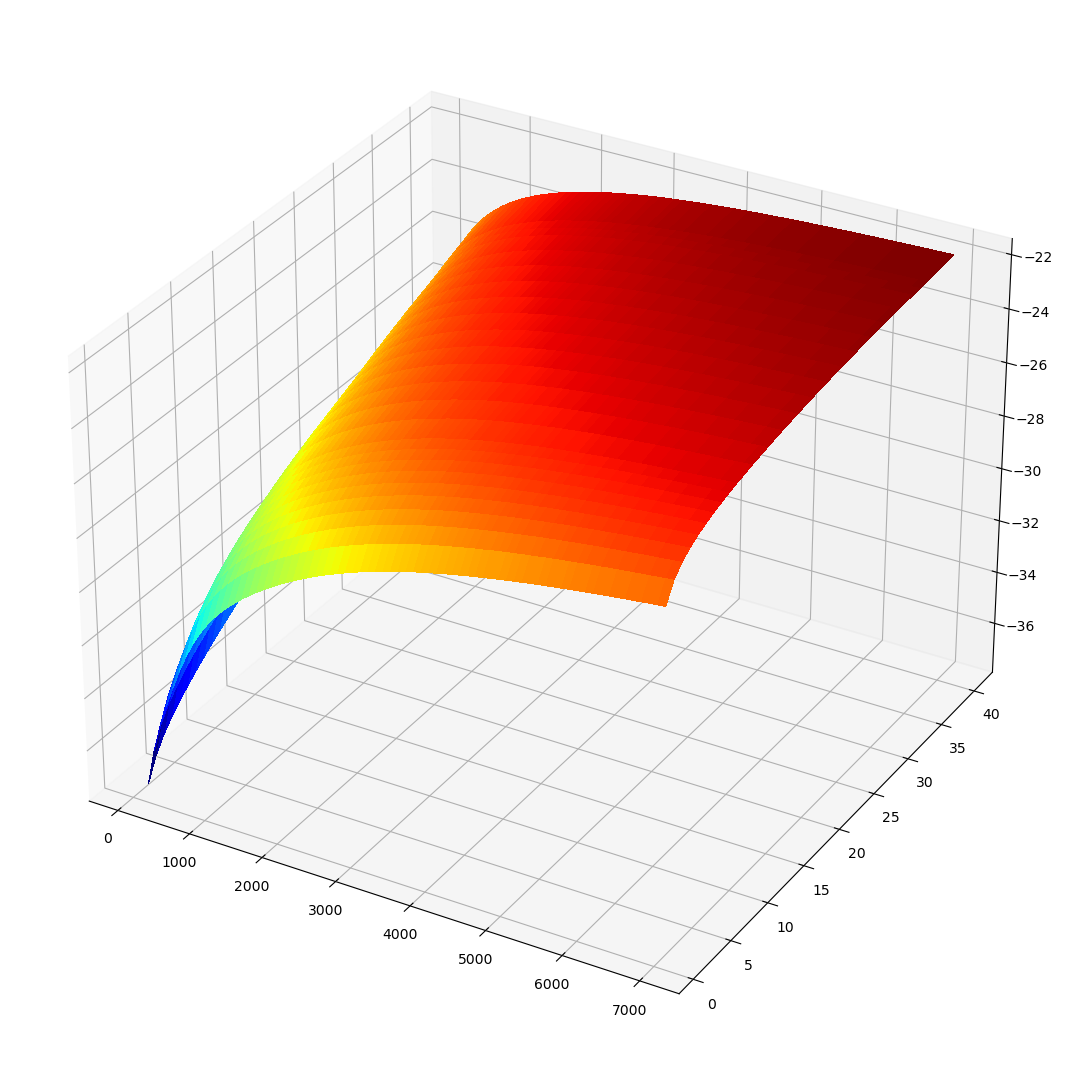

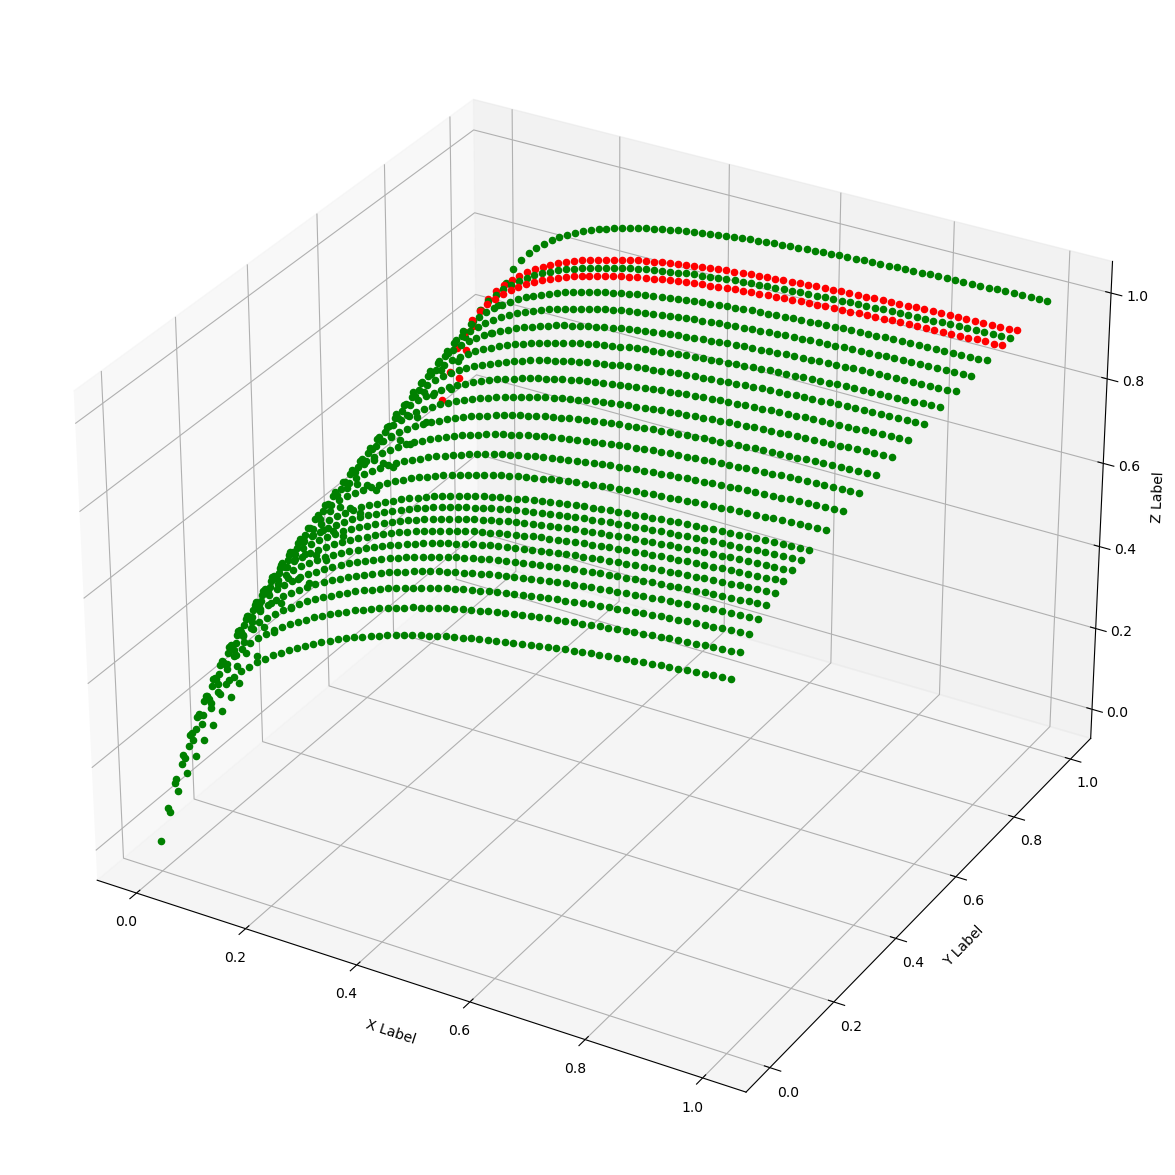

Start training 


/home/redo/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Done 
Normalized TestSet MSE  1.8824570757737006e-07  , TrainSet MSE , 5.761710164661538e-13
V =  34
T , True Value , Predicted Value
    100.00 ,      34.00 , -2.9597134e+01 , -2.9589926e+01 
    200.00 ,      34.00 , -2.8445207e+01 , -2.8448091e+01 
    300.00 ,      34.00 , -2.7432170e+01 , -2.7462771e+01 
    400.00 ,      34.00 , -2.6714730e+01 , -2.6720485e+01 
    500.00 ,      34.00 , -2.6184102e+01 , -2.6184058e+01 
    600.00 ,      34.00 , -2.5771603e+01 , -2.5772962e+01 
    700.00 ,      34.00 , -2.5429362e+01 , -2.5434005e+01 
    800.00 ,      34.00 , -2.5137816e+01 , -2.5139565e+01 
    900.00 ,      34.00 , -2.4877360e+01 , -2.4880911e+01 
   1000.00 ,      34.00 , -2.4650402e+01 , -2.4651399e+01 
   1100.00 ,      34.00 , -2.4448809e+01 , -2.4446964e+01 
   1200.00 ,      34.00 , -2.4267180e+01 , -2.4265074e+01 
   1300.00 ,      34.00 , -2.4107606e+01 , -2.4102929e+01 
   1400.00 ,      34.00 , -2.3959797e+01 , -2.3956552e+01 
   1500.00 ,      34.00 , -2.3828813e+01

In [22]:
filename = "dv1.xlsx"
df, vib_values , temp_values = cm.filterinitialset (filename)
testsetvib = [34, 36]

compute_and_plot (df, vib_values , temp_values, testsetvib)

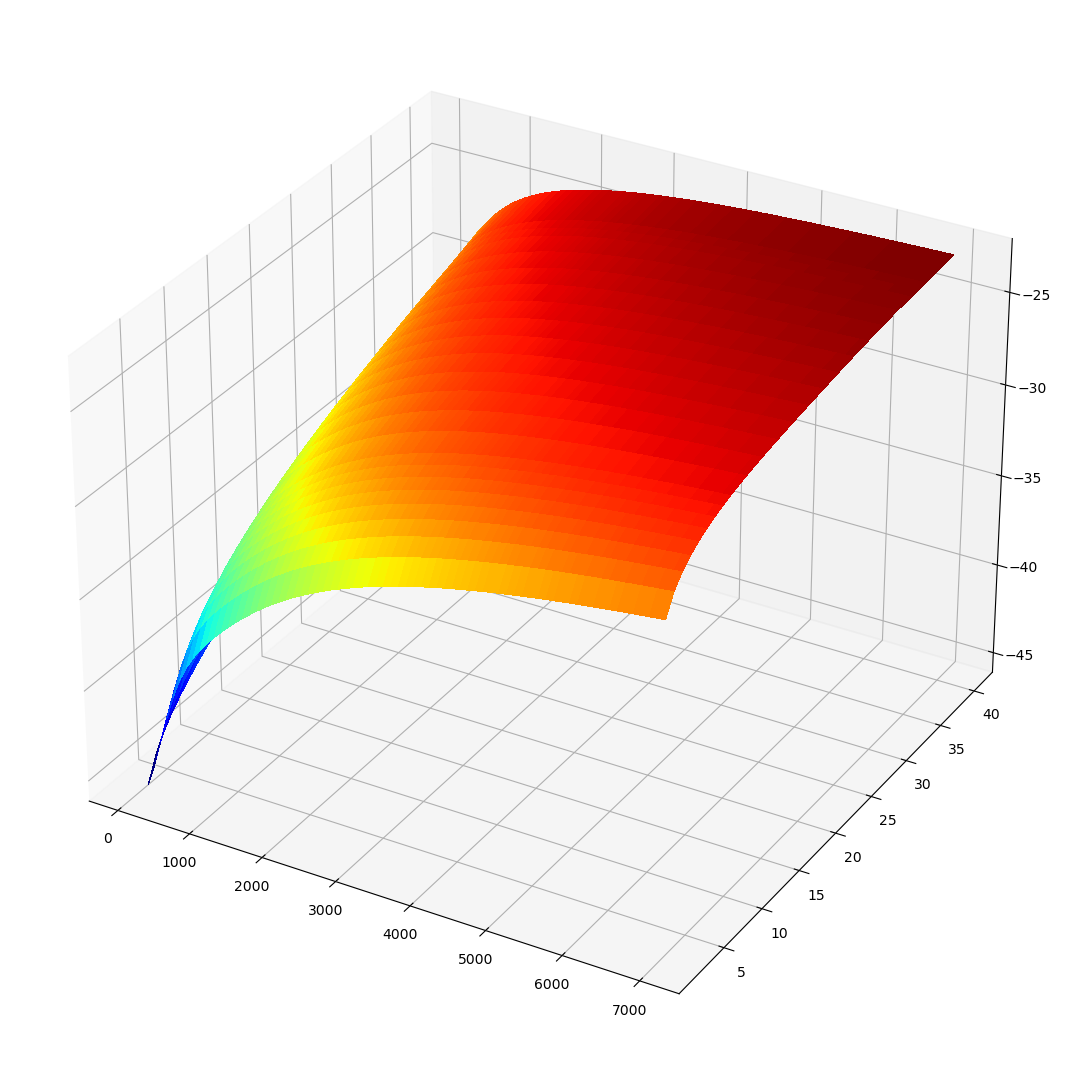

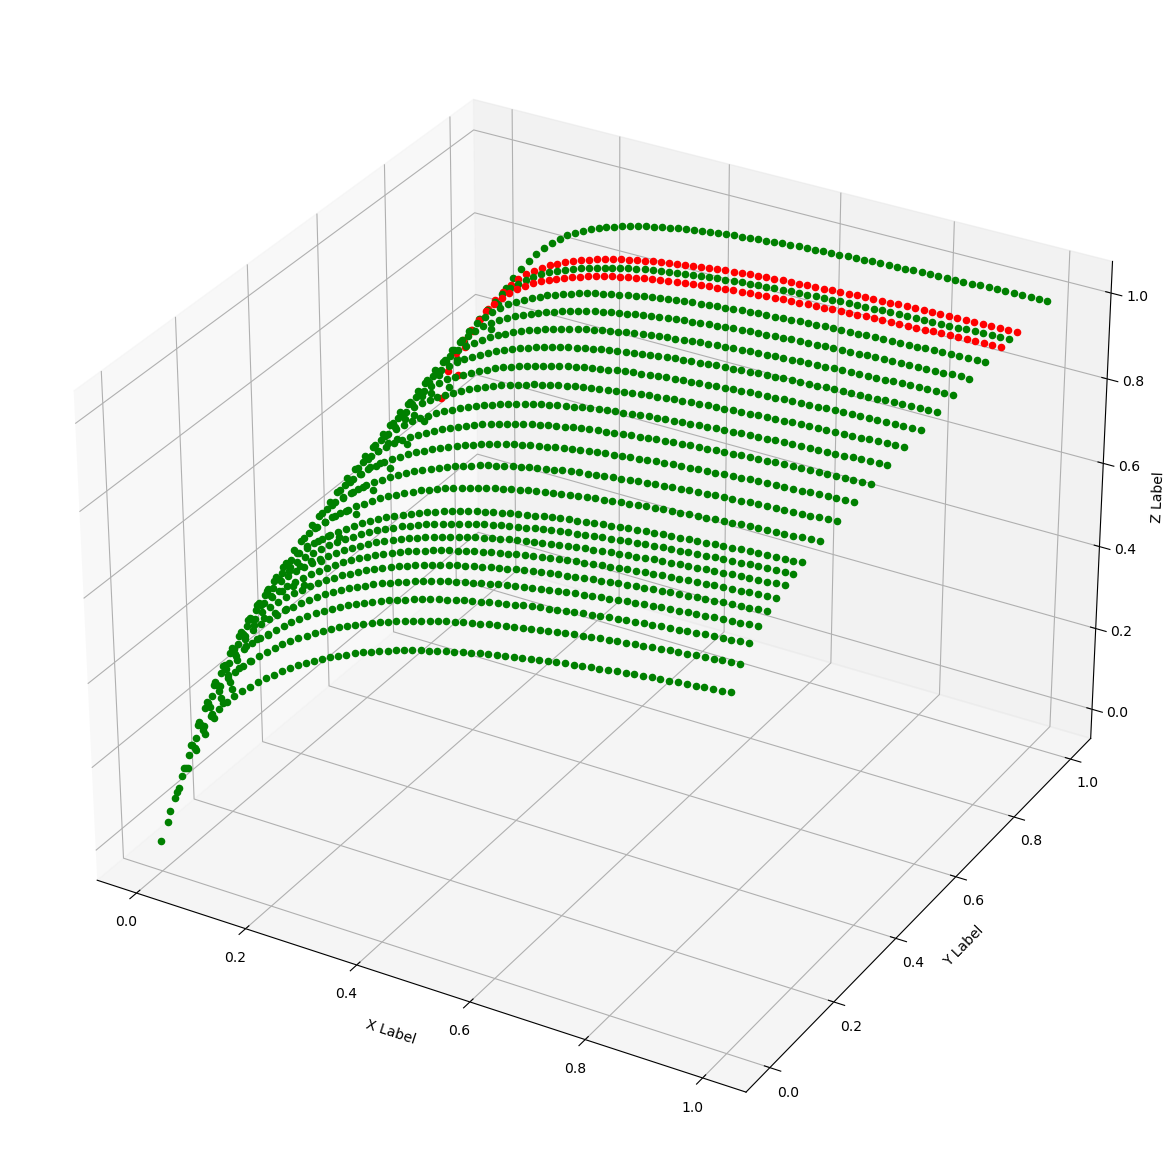

Start training 


/home/redo/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Done 
Normalized TestSet MSE  1.958034422615125e-06  , TrainSet MSE , 3.7308797342655394e-12
V =  34
T , True Value , Predicted Value
    100.00 ,      34.00 , -3.3845629e+01 , -3.3832252e+01 
    200.00 ,      34.00 , -3.2187401e+01 , -3.2142973e+01 
    300.00 ,      34.00 , -3.1085619e+01 , -3.1035229e+01 
    400.00 ,      34.00 , -3.0257952e+01 , -3.0224161e+01 
    500.00 ,      34.00 , -2.9541564e+01 , -2.9525548e+01 
    600.00 ,      34.00 , -2.8886287e+01 , -2.8876407e+01 
    700.00 ,      34.00 , -2.8286873e+01 , -2.8274975e+01 
    800.00 ,      34.00 , -2.7762269e+01 , -2.7741123e+01 
    900.00 ,      34.00 , -2.7316210e+01 , -2.7285171e+01 
   1000.00 ,      34.00 , -2.6927924e+01 , -2.6900089e+01 
   1100.00 ,      34.00 , -2.6601402e+01 , -2.6572169e+01 
   1200.00 ,      34.00 , -2.6314613e+01 , -2.6288811e+01 
   1300.00 ,      34.00 , -2.6064491e+01 , -2.6040897e+01 
   1400.00 ,      34.00 , -2.5842601e+01 , -2.5821808e+01 
   1500.00 ,      34.00 , -2.5643147e+01

In [23]:
filename = "dv2.xlsx"
df, vib_values , temp_values = cm.filterinitialset (filename)
testsetvib = [34, 36]

compute_and_plot (df, vib_values , temp_values, testsetvib)

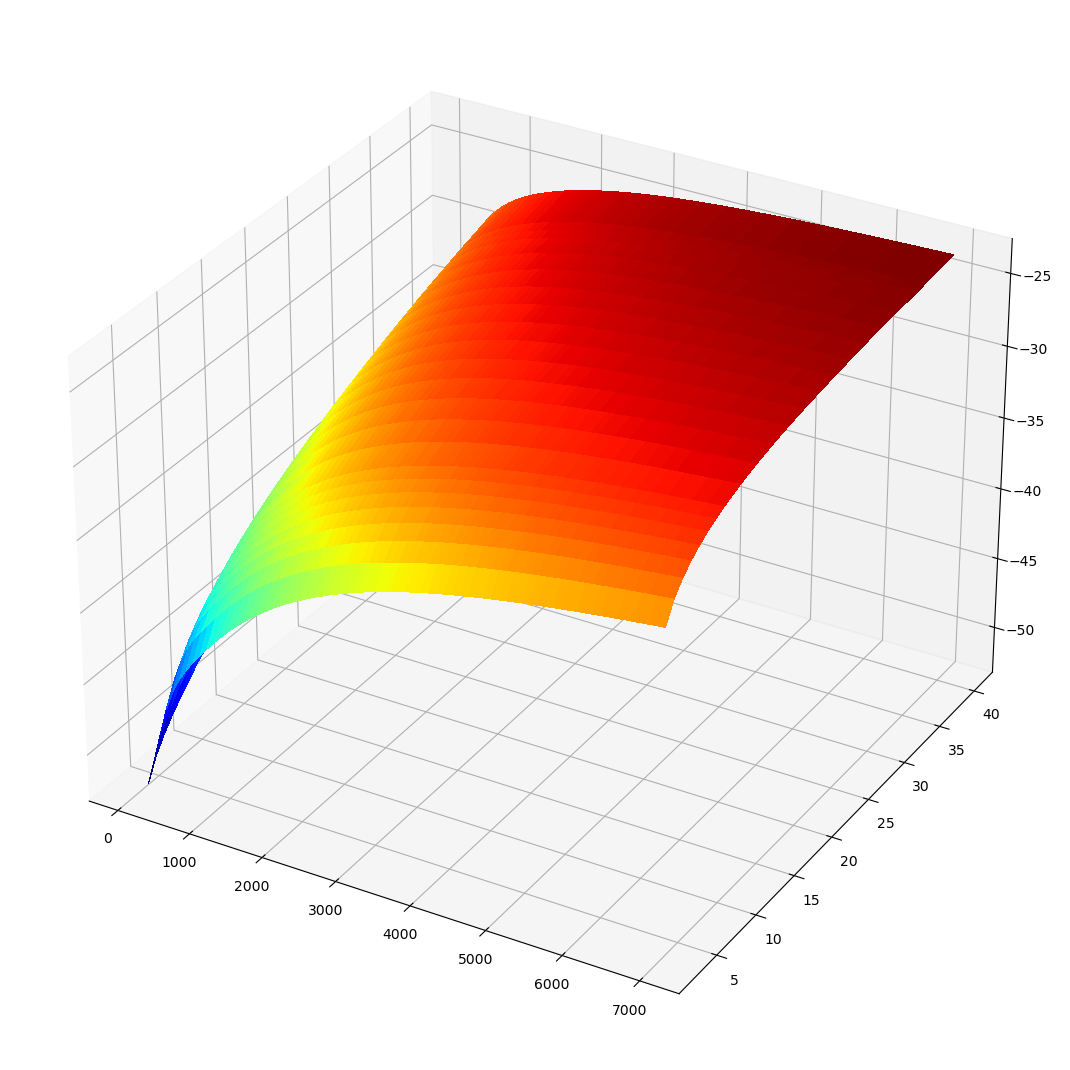

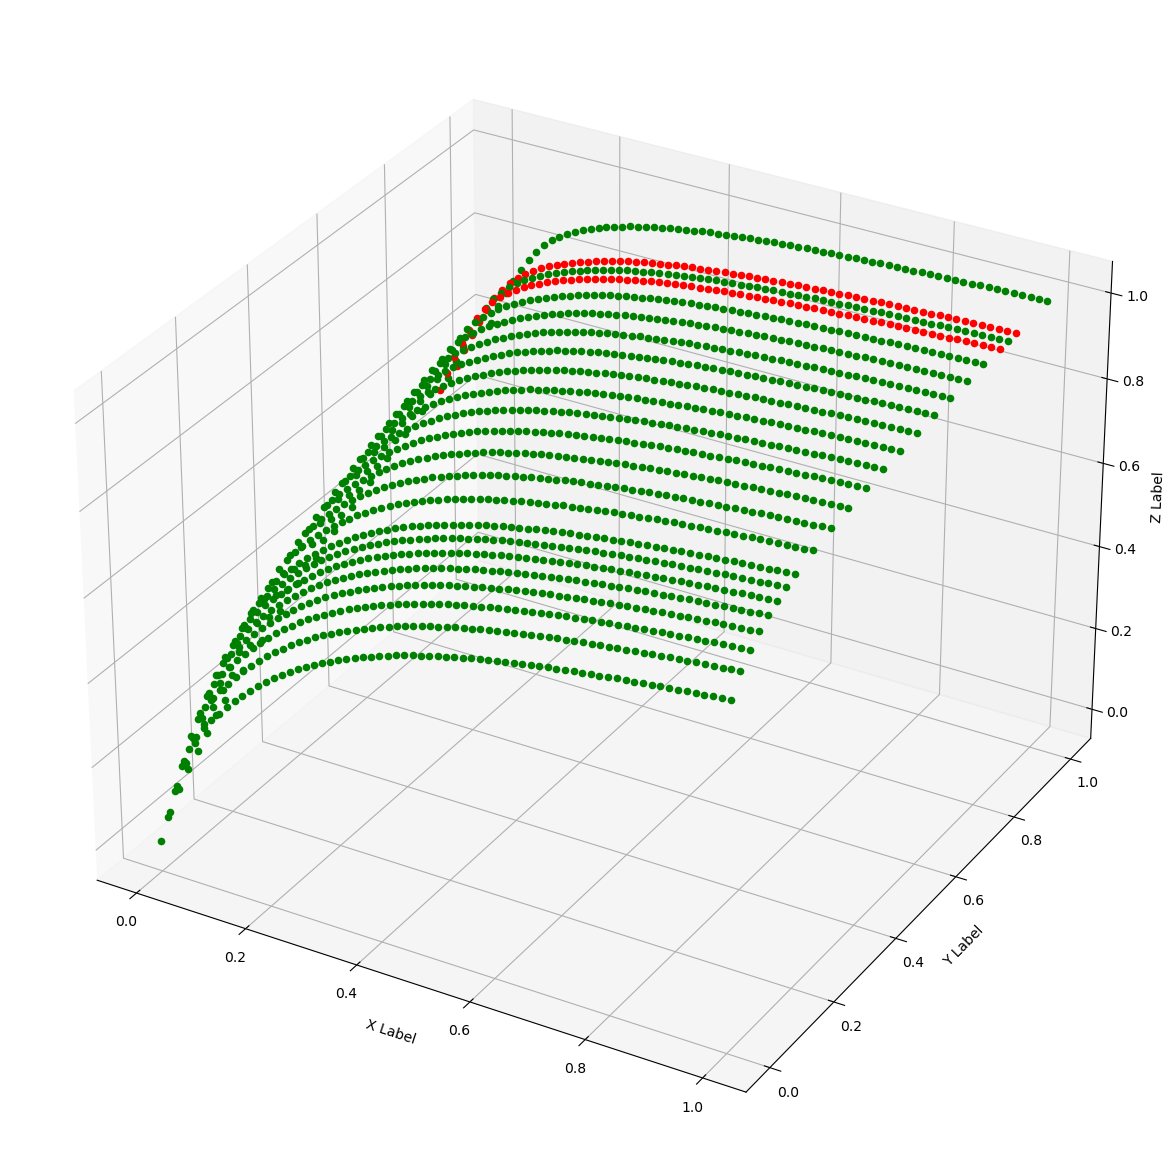

Start training 


/home/redo/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Done 
Normalized TestSet MSE  1.5676419235210262e-06  , TrainSet MSE , 1.8406303961689507e-13
V =  34
T , True Value , Predicted Value
    100.00 ,      34.00 , -3.6916085e+01 , -3.6907452e+01 
    200.00 ,      34.00 , -3.5549378e+01 , -3.5552813e+01 
    300.00 ,      34.00 , -3.4291916e+01 , -3.4307237e+01 
    400.00 ,      34.00 , -3.3147494e+01 , -3.3149103e+01 
    500.00 ,      34.00 , -3.2029177e+01 , -3.2059131e+01 
    600.00 ,      34.00 , -3.1057536e+01 , -3.1092354e+01 
    700.00 ,      34.00 , -3.0274689e+01 , -3.0295836e+01 
    800.00 ,      34.00 , -2.9648427e+01 , -2.9658875e+01 
    900.00 ,      34.00 , -2.9136099e+01 , -2.9143034e+01 
   1000.00 ,      34.00 , -2.8706894e+01 , -2.8712498e+01 
   1100.00 ,      34.00 , -2.8338267e+01 , -2.8341916e+01 
   1200.00 ,      34.00 , -2.8012282e+01 , -2.8014869e+01 
   1300.00 ,      34.00 , -2.7718760e+01 , -2.7720392e+01 
   1400.00 ,      34.00 , -2.7448700e+01 , -2.7449293e+01 
   1500.00 ,      34.00 , -2.7205753e+0

In [24]:
filename = "dv3.xlsx"
df, vib_values , temp_values = cm.filterinitialset (filename)
testsetvib = [34, 36]

compute_and_plot (df, vib_values , temp_values, testsetvib)